In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import gym
import gym_anytrading as anytrading
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C
import yfinance as yf
from datetime import datetime


In [32]:
#Need to import data whenever I want to run this stuff
print(datetime.today().strftime('%Y-%m-%d-%H:%M:%S'))

today = datetime.today().strftime('%Y-%m-%d')

spy_ohlc_df = yf.download('SPY', start='1991-02-01', end=today)
df = spy_ohlc_df.iloc[:,:4]
df

2021-05-02-23:03:35
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close
Date,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500
1993-02-01,43.968750,44.250000,43.968750,44.250000
1993-02-02,44.218750,44.375000,44.125000,44.343750
1993-02-03,44.406250,44.843750,44.375000,44.812500
1993-02-04,44.968750,45.093750,44.468750,45.000000
...,...,...,...,...
2021-04-26,417.440002,418.220001,416.809998,417.609985
2021-04-27,417.929993,418.140015,416.299988,417.519989
2021-04-28,417.809998,419.010010,416.899994,417.399994


In [66]:
#Make environment
env = gym.make('stocks-v0', df = df, frame_bound = (20, len(df) - 100), window_size = 20)


{'total_reward': 301.08727264404297, 'total_profit': 3.539839116467127e-11, 'position': 0}


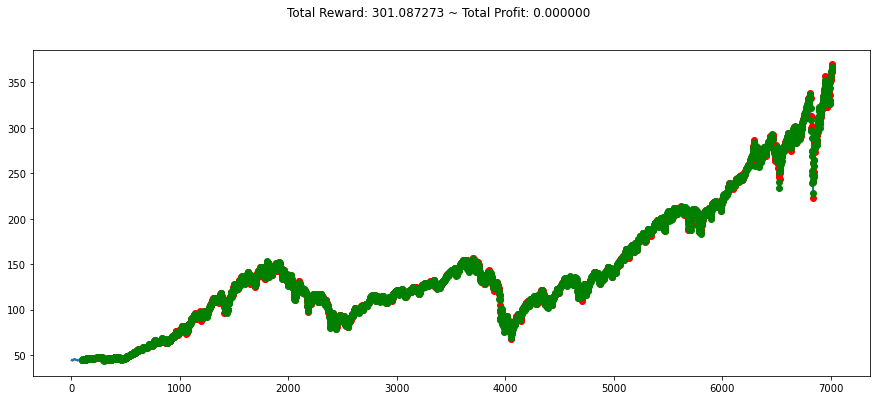

In [67]:
#Random action on environment
state = env.reset()
while True:
    action = env.action_space.sample()
    next_state, reward, done, info = env.step(action)
    if done:
        print(info)
        break
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [68]:
env_training = lambda: gym.make('stocks-v0', df = df, frame_bound = (10, len(df) - 50), window_size = 10)

In [80]:
env = DummyVecEnv([env_training])
model = A2C("MlpPolicy", env, verbose = 1)
model.learn(total_timesteps = 100000)


Using cpu device
-------------------------------------
| time/                 |           |
|    fps                | 855       |
|    iterations         | 100       |
|    time_elapsed       | 0         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -0.681    |
|    explained_variance | -0.000171 |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | 0.134     |
|    value_loss         | 0.0402    |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 855       |
|    iterations         | 200       |
|    time_elapsed       | 1         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -0.685    |
|    explained_variance | -0.000808 |
|    learning_rate      | 0.0007    |
|    n_updates          | 199       |
|    policy_loss        | 0.00046

KeyboardInterrupt: 